In [1]:
import sys
sys.path.append('/home/yifan/projects/Trustvis')
from singleVis.data import NormalDataProvider
tar_CONTENT_PATH='/home/yifan/datasets/MNIST_Backdoor/white_lower_left_4'
ref_CONTENT_PATH = '/home/yifan/datasets/MNIST_Clean/01'
epoch = 5
sys.path.append(ref_CONTENT_PATH)
import Model.model as subject_model
net = eval("subject_model.{}()".format('resnet18'))


ref_data_provider = NormalDataProvider(ref_CONTENT_PATH , net, epoch, epoch, 1, device='cuda:0', epoch_name='Epoch',classes=[],verbose=1)
tar_data_provider =  NormalDataProvider(tar_CONTENT_PATH , net, epoch, epoch, 1, device='cuda:0', epoch_name='Epoch',classes=[],verbose=1)

ref_data = ref_data_provider.train_representation(epoch)
ref_data = ref_data.reshape(ref_data.shape[0],ref_data.shape[1])
tar_data = tar_data_provider.train_representation(epoch)
tar_data = tar_data.reshape(tar_data.shape[0],tar_data.shape[1])

ref_pred = ref_data_provider.get_pred(epoch,ref_data)
tar_pred = tar_data_provider.get_pred(epoch,tar_data)

Finish initialization...
Finish initialization...


100%|██████████| 300/300 [00:00<00:00, 8158.43it/s]


In [28]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def align_subspaces(source_data, target_data, n_components):
    """
    对齐两个高维数据表征的子空间。
    
    参数:
    - source_data: 源域数据，形状为 (n_samples_source, n_features)
    - target_data: 目标域数据，形状为 (n_samples_target, n_features)
    - n_components: PCA降维后的目标维数
    
    返回:
    - transformed_source: 对齐到目标子空间后的源域数据
    - M: 子空间对齐的变换矩阵
    """
    # 数据标准化
    scaler = StandardScaler()
    source_data = scaler.fit_transform(source_data)
    target_data = scaler.transform(target_data)
    
    # 应用PCA
    pca_source = PCA(n_components=n_components)
    pca_target = PCA(n_components=n_components)
    
    source_subspace = pca_source.fit_transform(source_data)
    target_subspace = pca_target.fit_transform(target_data)
    
    # 计算变换矩阵M
    M = np.linalg.pinv(pca_source.components_.T) @ pca_target.components_.T
    
    # 使用M变换源域数据
    transformed_source = source_subspace @ M
    
    return transformed_source, M, target_subspace

# 示例数据
# 假设 source_data 和 target_data 分别是你的源域和目标域高维数据表征
# source_data = np.random.randn(100, 50)  # 示例：100个样本，每个样本50维
transformed_source, M,target_subspace = align_subspaces(ref_data[:50], tar_data[:50], 2)


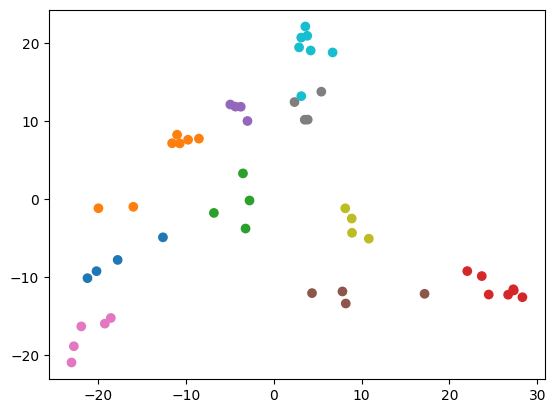

In [29]:
import matplotlib.pyplot as plt
import numpy as np


label = ref_data_provider.train_labels(epoch)
plt.scatter(target_subspace[:,0], target_subspace[:,1],c=label[:50],cmap='tab10')
plt.show()

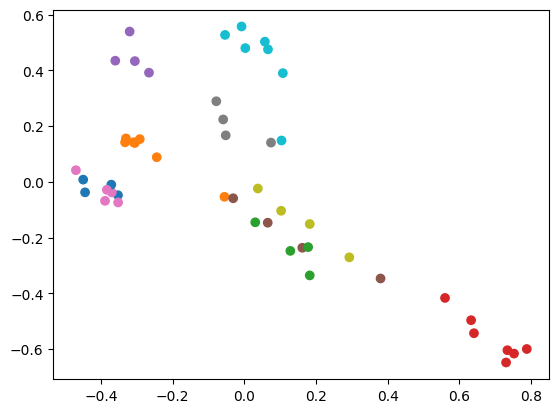

In [30]:
import matplotlib.pyplot as plt
import numpy as np


label = ref_data_provider.train_labels(epoch)
plt.scatter(transformed_source[:,0], transformed_source[:,1],c=label[:50],cmap='tab10')
plt.show()

TypeError: align_high_dim_subspaces() takes 2 positional arguments but 3 were given